### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Stipendio medio annuo per paese:
job_country
Belarus                     400000.000000
Russia                      292500.000000
Bahamas                     201511.619048
Dominican Republic          157500.000000
Northern Mariana Islands    155485.500000
                                ...      
Tanzania                              NaN
Togo                                  NaN
Trinidad and Tobago                   NaN
Venezuela                             NaN
Yemen                                 NaN
Name: salary_year_avg, Length: 160, dtype: float64

Numero di offerte di lavoro per paese:
job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Lesotho                3
Mauritania             3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64

Intervallo stipendi per paese:
                 min       max
job_country  

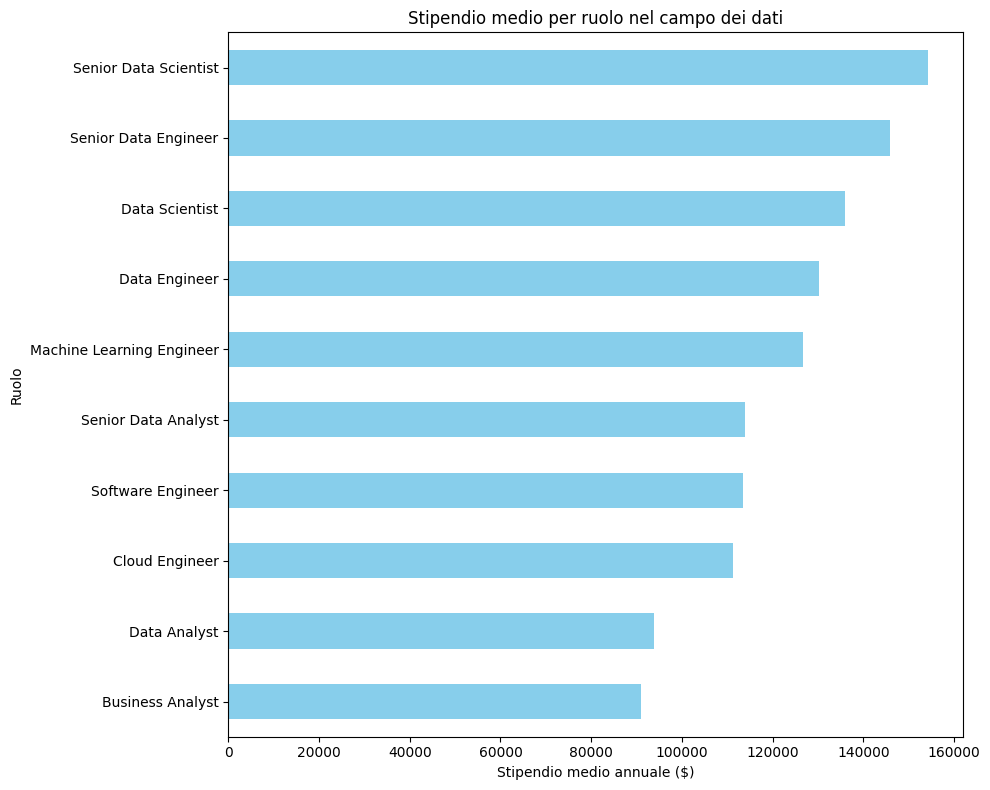

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# 1. Stipendio medio annuo per paese
salary_avg = df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False)
print("Stipendio medio annuo per paese:")
print(salary_avg)

# 2. Numero totale di offerte di lavoro per paese
job_count = df['job_country'].value_counts()
print("\nNumero di offerte di lavoro per paese:")
print(job_count)

# 3. Intervallo stipendi (min e max) per paese
salary_range = df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])
print("\nIntervallo stipendi per paese:")
print(salary_range)

# 4. Grafico a barre orizzontali: stipendio medio per ruolo (job_title_short)
role_salary_avg = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values()

plt.figure(figsize=(10, 8))
role_salary_avg.plot(kind='barh', color='skyblue')
plt.title("Stipendio medio per ruolo nel campo dei dati")
plt.xlabel("Stipendio medio annuale ($)")
plt.ylabel("Ruolo")
plt.tight_layout()
plt.show()
